# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement
Description
###Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.



###Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.


### Data Dictionary

Data Dictionary:

order_id: Unique ID of the order

customer_id: ID of the customer who ordered the food

restaurant_name: Name of the restaurant

cuisine_type: Cuisine ordered by the customer

cost_of_the_order: Price paid per order

day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

rating: Rating given by the customer out of 5

food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information



### Let us start by importing the required libraries

In [124]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [125]:
#Mount to Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AI_ML_Projects/Foodhub/foodhub_order.csv')

In [ ]:
 # Check first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#To check last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [ ]:
#To check random entries
df.sample(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1568,1476920,36118,RedFarm Broadway,Chinese,12.13,Weekend,4,20,19
661,1478387,70564,Jack's Wife Freda,Mediterranean,12.08,Weekend,5,30,19
1417,1477417,355759,Pinto Nouveau Thai Bistro,Thai,11.79,Weekend,5,21,27
1007,1478404,97991,Blue Ribbon Sushi Bar & Grill,Japanese,33.03,Weekend,5,28,15
1813,1477381,316223,The Smile,American,25.22,Weekday,4,25,28


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

#### Observations:

*   There are **1898 rows** and **9 columns**





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Check th datatypes and columns names using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are totally **9 columns**
*   There are **1898 entries** (Rows)
*   Data Types: **integer 4 column, Object 4 columns, float 1 column**
*   Observed that there is **no missing values**
*   Noticed that **data type for rating is object** , but we have to convert into **float** (ex.4.3)







### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
*   Observed that there is **no missing values** in the data set

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Check the Statistical summary usign describe() method
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


*   **Minimum 20 min** required for food to be prepared once an order is placed
*   **Average of 27.3 min** required for food to be prepared once is placed
*   **Maximum 35 min** required for food to be prepared once an order is placed







### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# To check the order qty which are not having rating
((df['rating'].str.strip() == "Not given").sum())

736

#### Observations:
There are **736 orders** not having rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

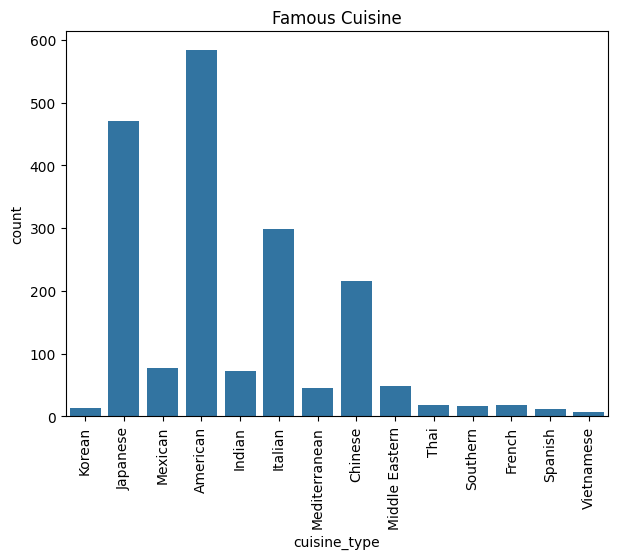

In [ ]:
# Check the count of food category(Cuisine Type)
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.title('Famous Cuisine')
plt.show()

#### Observations:
*   **American** Cusine available nearly **600 resturants**
*   Second most Cusine is **Japanese** available in nearly **500 restaurants**
*   **Vietammese** Cusine has the lowest count of restaurants






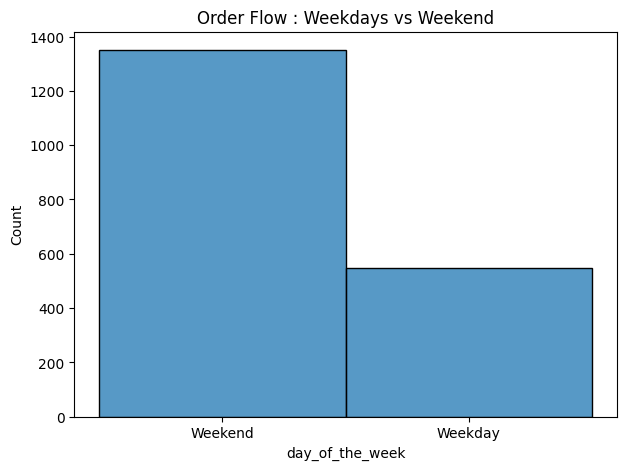

In [ ]:
#Check the order count vs week days or week end
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='day_of_the_week')
plt.title('Order Flow : Weekdays vs Weekend')
plt.show()

#### Observations:
*   Maximum Orders received on weekend, valued **nearly 1350**
*   There are around **540 Orders** received on week days

Lets see the percentage on below graph

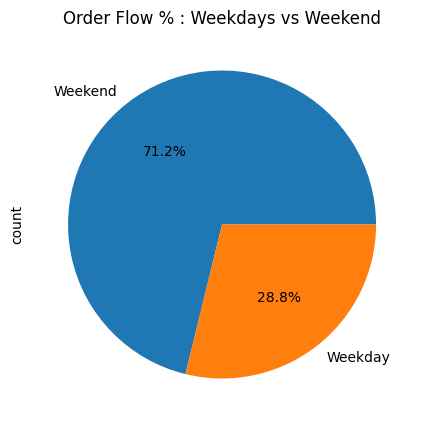

In [ ]:
#plot pie chart for order flow
plt.figure(figsize=(7,5))
df['day_of_the_week'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Order Flow % : Weekdays vs Weekend')
plt.show()

#### Observations:
So, Majority of orders received on Weekend. **ie. 71.2%** , while Week days has **28.8%**

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


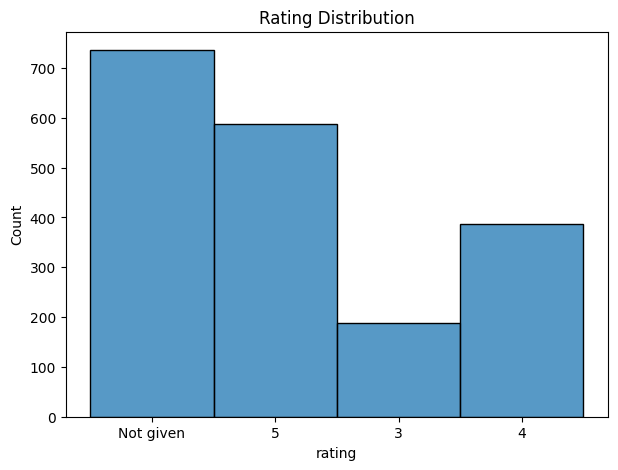

In [ ]:
#Find the distribution of Rating
print(df['rating'].value_counts())

plt.figure(figsize=(7,5))
sns.histplot(data=df,x='rating')
plt.title('Rating Distribution')
plt.show()

#### Observations:
*   Observed that there are **736** Orders not having rating
*   There are nearly **588** orders Five Star Rating
*   There are **386** orders Four Star Rating
*   There are **188** orders Three Star Rating


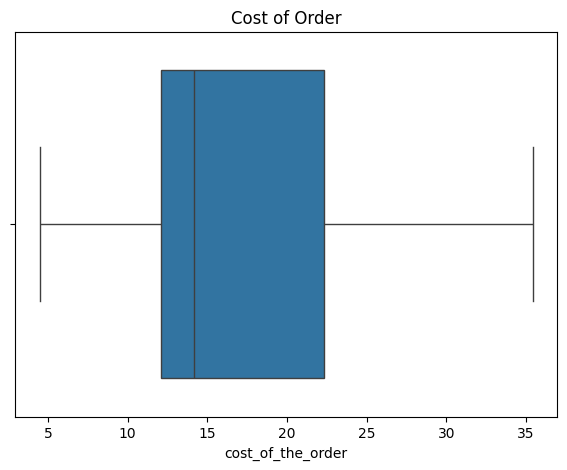

In [ ]:
#Analyzing the cost of order
plt.figure(figsize=(7,5))
sns.boxplot(x='cost_of_the_order', data=df);
plt.title('Cost of Order')
plt.show()

#### Observations:


1.   Noticed that there is **no outliers**
2.   Most orders cost between **12 to 20**. This is the **typical spending pattern of customers**
2.   There are a few orders with costs exceeding 30 units, which may be **premium or larger orders**



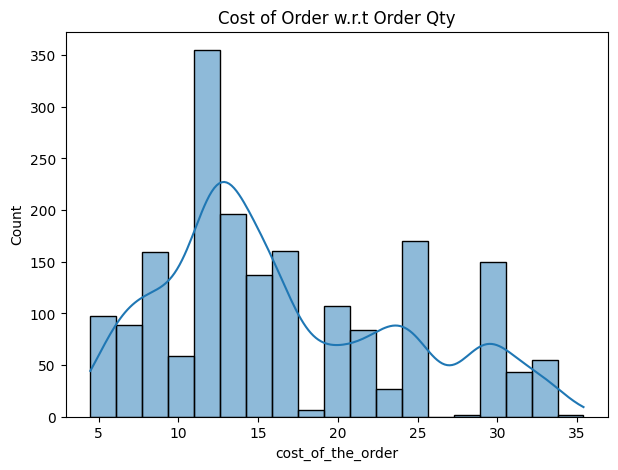

In [ ]:
#Analyzing order cost with histogram
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='cost_of_the_order', kde=True)
plt.title('Cost of Order w.r.t Order Qty')
plt.show()

#### Observations:
As we observed in Box plot, the histogram distribution also showing the majority of order cost is between **12 to 20 dollars**

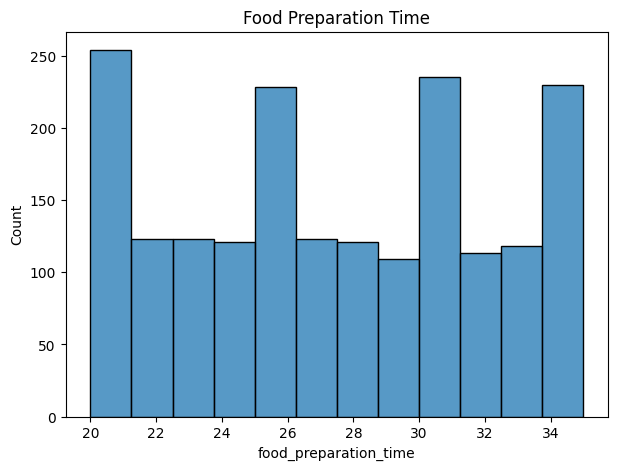

In [ ]:
#Analysis the Food Preparation Time
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='food_preparation_time')
plt.title('Food Preparation Time')
plt.show()

#### Observations:
*   The food preparation time ranges between **20 to 35 minutes**.
*   There are noticeable peaks around **20, 26, 30, and 35 minutes**, where each bar exceeds **200 orders**. This suggests that these specific preparation times are common benchmarks.

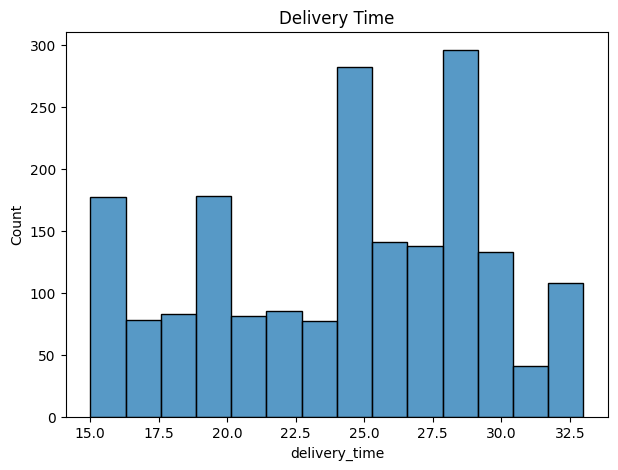

In [ ]:
#Analyzing the delivery time with histplot
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='delivery_time')
plt.title('Delivery Time')
plt.show()

#### Observations:
*   There is a noticeable peak around **25 to 27.5 minutes**
*   Delivery times less than 20 minutes and greater than 30 minutes are less frequent. This might indicate that either the orders take longer in most cases, or there are very few fast deliveries (under 20 minutes).

In [ ]:
# Check uniqueness of 'order_id' and 'customer_id', Find duplication
unique_orders = df['order_id'].nunique()
unique_customers = df['customer_id'].nunique()

print(f'Unique Order IDs: {unique_orders}')
print(f'Unique Customer IDs: {unique_customers}')

Unique Order IDs: 1898
Unique Customer IDs: 1200


#### Observations:
*   **There is no duplication in Order IDs and Customers IDs.**

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

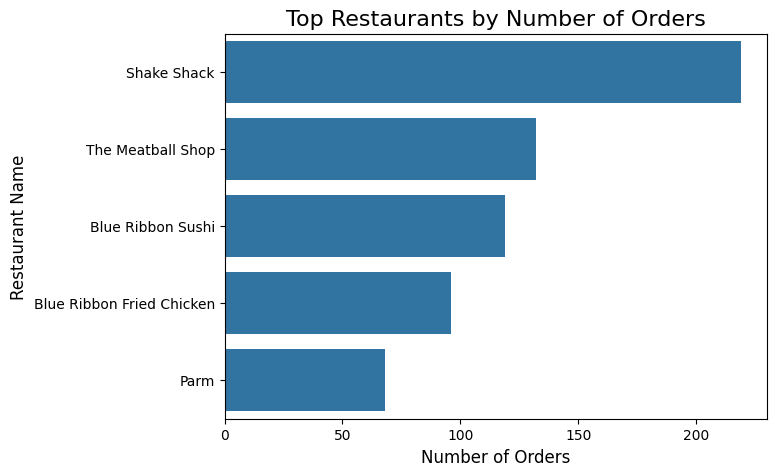

In [ ]:
#Check Top 5 Restauant based on Order count
top_reataurants=df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head()
plt.figure(figsize=(7, 5))
sns.barplot(x=top_reataurants.values, y=top_reataurants.index)
plt.title('Top Restaurants by Number of Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.show()

#### Top 5 Restaurants are:
1. **Shake Shack**
2. **The meatball shop**
3. **Blue Ribbon Sushi**
4. **Blue Ribbon Fried Chicken**
5. **Parm**



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

Text(0, 0.5, 'Cuisine')

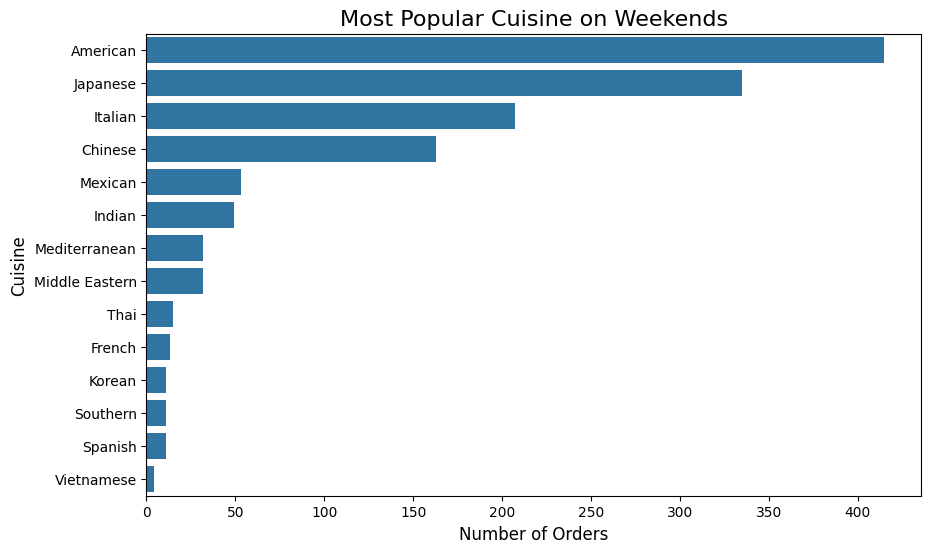

In [ ]:
# Checking which is the most popular cuising on weekends
# Filter for weekend orders
Weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Group by cuisine and count orders
popular_cuisine = Weekend_orders.groupby('cuisine_type')['order_id'].count().sort_values(ascending=False)

# Plotting the popular cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_cuisine.values, y=popular_cuisine.index)
plt.title('Most Popular Cuisine on Weekends', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)

#### Observations:
*  **American** is the most popular Cuisine on Weekends, Which is having more than **400 Orders**



*   2nd popular is Japanese
*   3rd popular is italian




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Check percentage of orders cost more than 20 dollars
#Filter order value above 20 USD & total qty of orders by using shape function quickly
order_vlaue_above_20 = df[df['cost_of_the_order'] >20].shape[0]

#We already know that total order in the dataset is 1898
Total_order_quantity=df.shape[0]

#Percenatge
Percentage_of_order_above_20 = (order_vlaue_above_20/Total_order_quantity)*100
Percentage_of_order_above_20

29.24130663856691

#### Observations:
* There are **29.2 %** of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

24.161749209694417


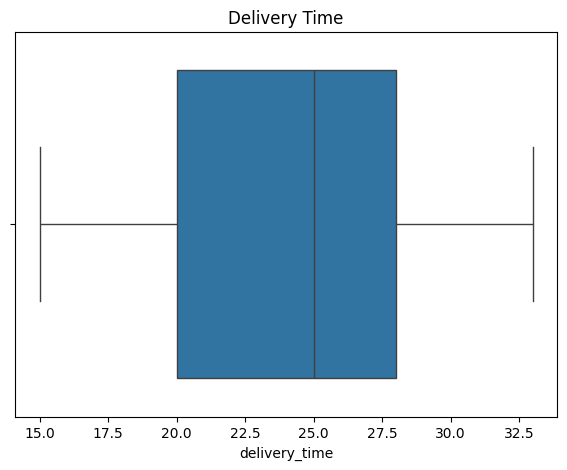

In [ ]:
# Find mean order delivery time by using box plot
print(df['delivery_time'].mean())

#We can see this result using Box plot
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='delivery_time');
plt.title('Delivery Time')
plt.show()

#### Observations:

*  The mean order delivery time is around **24 minute**



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

     customer_id  order_count
116        52832           13
84         47440           10
333        83287            9


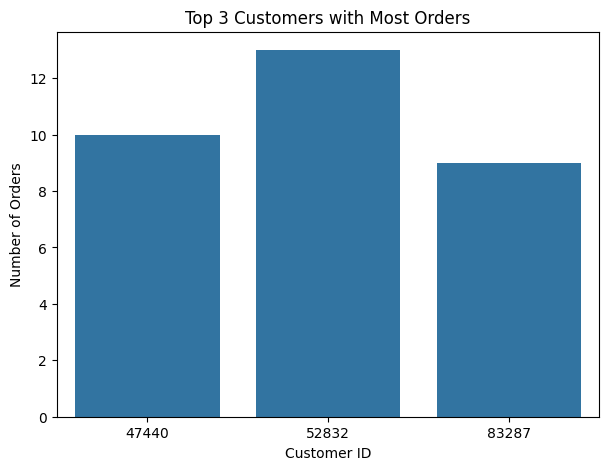

In [ ]:
# First group the order count for customers
customer_order_count =df.groupby('customer_id').size().reset_index(name='order_count')

# sort the filtered result
top_customers = customer_order_count.sort_values(by='order_count', ascending=False)

#show only top 3 customers
top_3_customers = top_customers.head(3)
print(top_3_customers)

#Plot the bar chart for the top3 customers
plt.figure(figsize=(7,5))
sns.barplot(x='customer_id', y='order_count', data=top_3_customers)
plt.title('Top 3 Customers with Most Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
*  Customer ID **52832** is in 1st place, with **order qty of 13**
*  Customer ID **47440** is in 2nd place, with **order qty of 10**
*  Customer ID **83287** is in 3rd place, with **order qty of 9**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


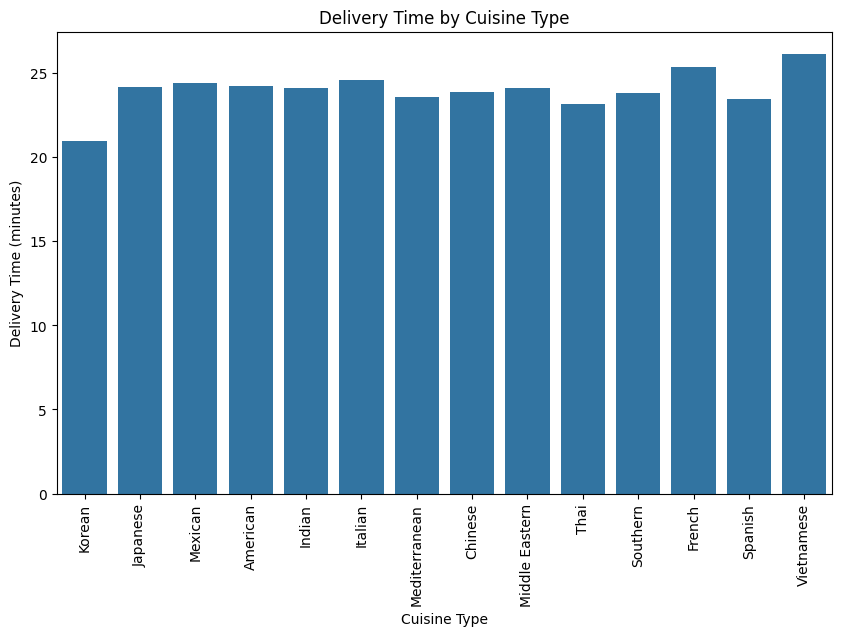

In [ ]:
#Analyze cousine type vs delivery time
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cuisine_type', y='delivery_time', errorbar=None)
plt.title('Delivery Time by Cuisine Type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')
plt.show()

#### Observations:

*   **Korean having less Delivery Time**
*   **Vietnamese is the more time taking Cuisine. ie.25 minutes**

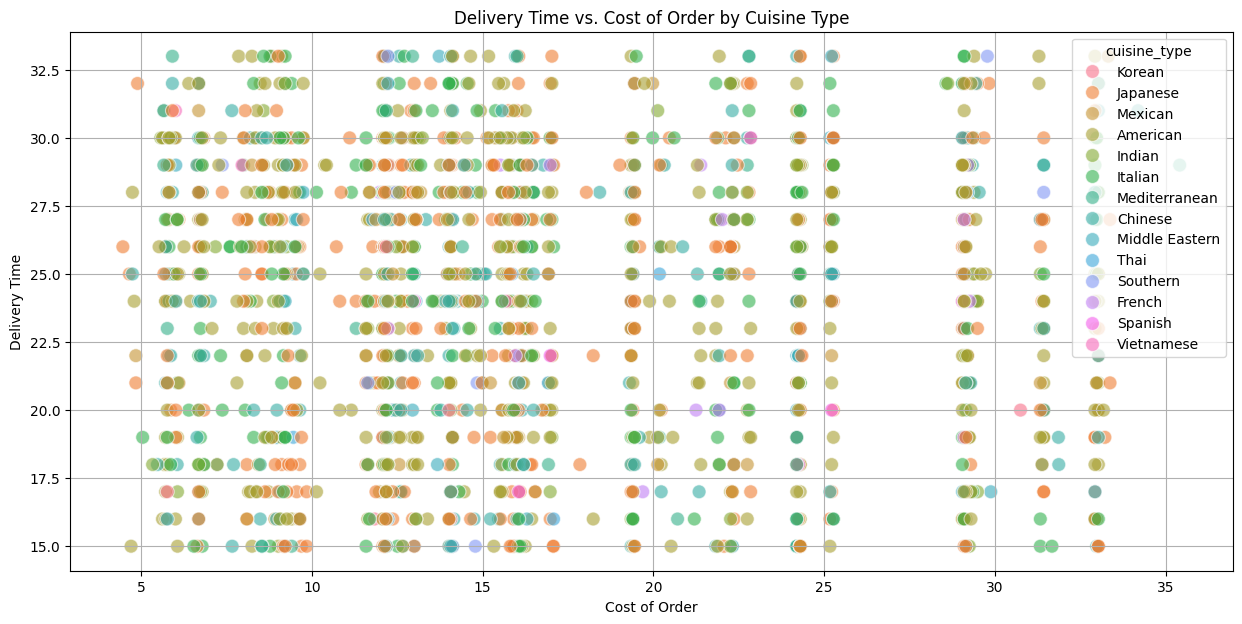

In [ ]:
#Find the relation between Cost vs. Delivery Time vs Cuisine Type (Scatter Plot)
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', hue='cuisine_type', s=100, alpha=0.6);
plt.title('Delivery Time vs. Cost of Order by Cuisine Type')
plt.xlabel('Cost of Order')
plt.ylabel('Delivery Time')
plt.grid(True)


#### Observations:

*   There seems to be clustering around specific price points (e.g., 10, 15, 20, 25). This may indicate that many orders fall around these standard price ranges.

*   Delivery times also seem to have clustering around intervals like 20 minutes, 25 minutes, and 30 minutes.

*   There is no clear linear relationship between the cost of an order and the delivery time. Both variables appear to have a random distribution, with delivery times varying significantly for orders of similar costs.

*   Korean, Japanese, and American orders are frequently found in the 10–20 range.

*   French, Italian, and Mediterranean appear more frequently in higher-cost ranges (25–30+).

*   Delivery times for most cuisines are generally spread across a similar range, with some variation. For instance, French and Mediterranean orders tend to appear with longer delivery times compared to others.





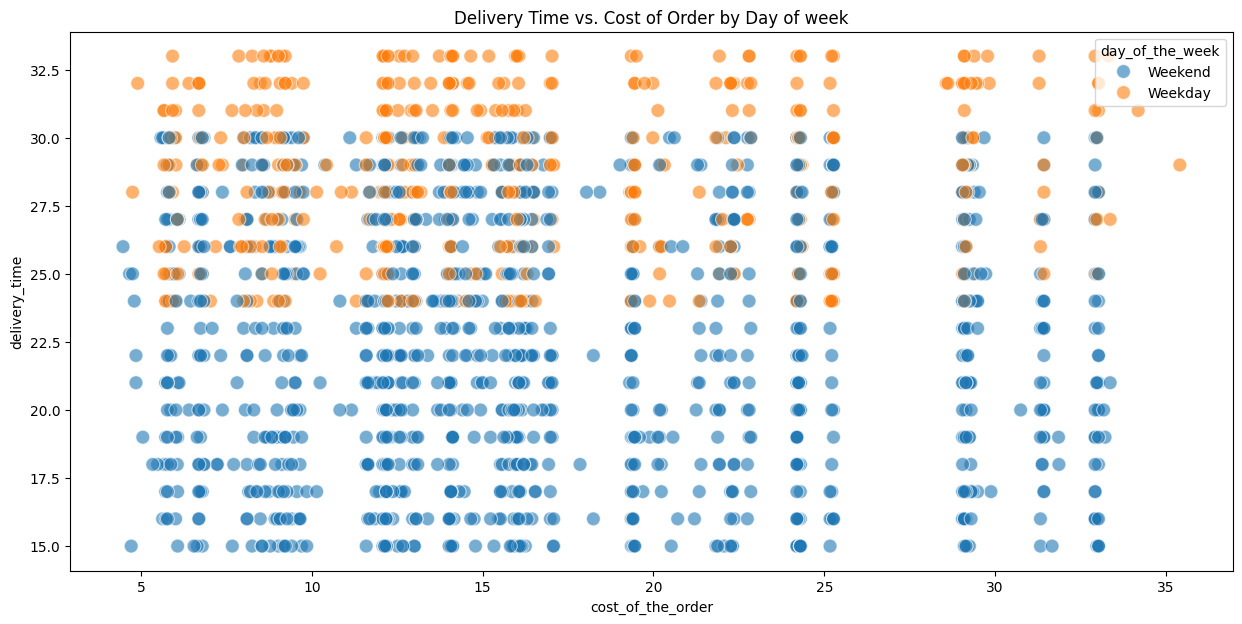

In [ ]:
#Comparision of Order Cost vs. Delivery time vs Day of week
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', hue='day_of_the_week', s=100, alpha=0.6);
plt.title('Delivery Time vs. Cost of Order by Day of week');
plt.show()

#### Observations:

*   Low cost order (0-25): The delivery times seem evenly distributed across this range, but there is a noticeable concentration of points around 20-25 minutes for both weekdays and weekends.
*   Mid-range orders (10-25):As the cost of the order increases, the delivery time tends to remain around 20-30 minutes, with more variation on weekends (orange points).
*   High-cost orders (above 25):The delivery time tends to be slightly more spread out, but there is still a clustering around the 25-30 minute range.

**Weekdays:** The delivery times are relatively more consistent across the cost range, with a tendency to hover between 20-30 minutes, showing less variability.

**Weekends:** There appears to be more variability in delivery times, especially for mid-range orders. This could be due to higher restaurant demand or delivery traffic on weekends, leading to some delays.





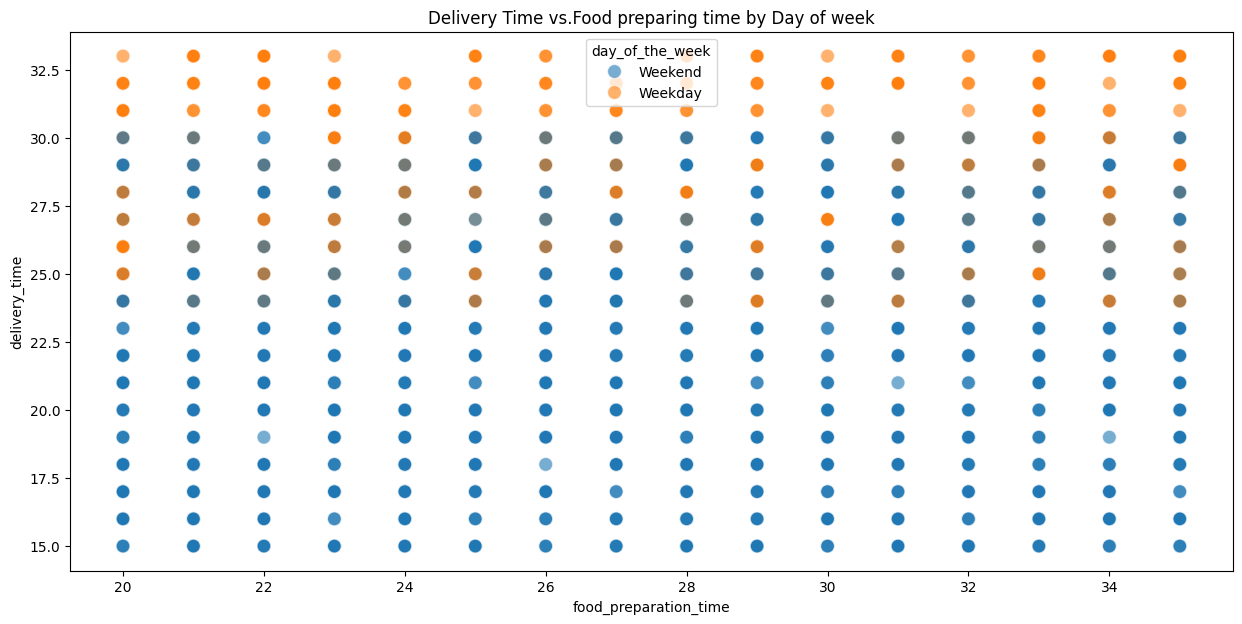

In [ ]:
#Analyze Food preparation time vs Food delivery time using scatter
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', hue='day_of_the_week', s=100, alpha=0.6);
plt.title('Delivery Time vs.Food preparing time by Day of week');

#### Observations:

*   Weekend having more order
*   Noticed that Food preparation time varying between 20 to 35 min across all restaurants
*   Food delivery time varying between 15 to 32 min also almost same for all restaurants
*   So, Food preparation time does not diretly affect the Delivery time
*   On weekends, there is a bit more variability in delivery times, particularly for food preparation times in the range of 28 to 34 minutes.








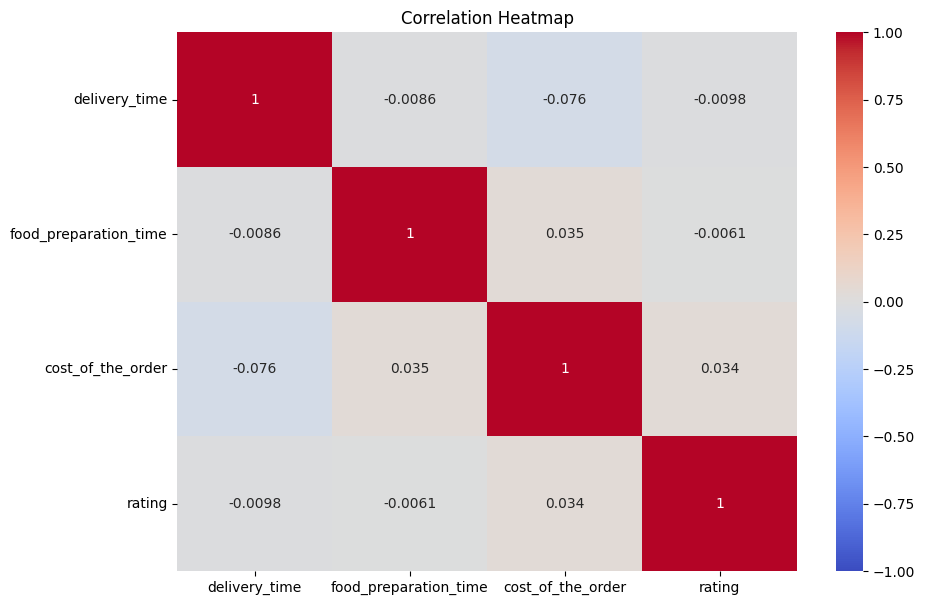

In [ ]:
#Find correlation amoung across variables

#Convert relevant columns to numeric, forcing non-convertible values to NaN
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#Drop rows with NaN in any of the relevant columns
df_clean = df[['delivery_time', 'food_preparation_time', 'cost_of_the_order', 'rating']].dropna()

#Calculate the correlation matrix on the cleaned data
correlation_matrix = df_clean.corr()

#Plotting the correlation heatmap
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Observations:

*   The heatmap indicates that **there is no strong linear relationship** between any of the variables considered. This suggests that factors like delivery time, food preparation time, cost, and customer ratings are largely independent of each other in this dataset.

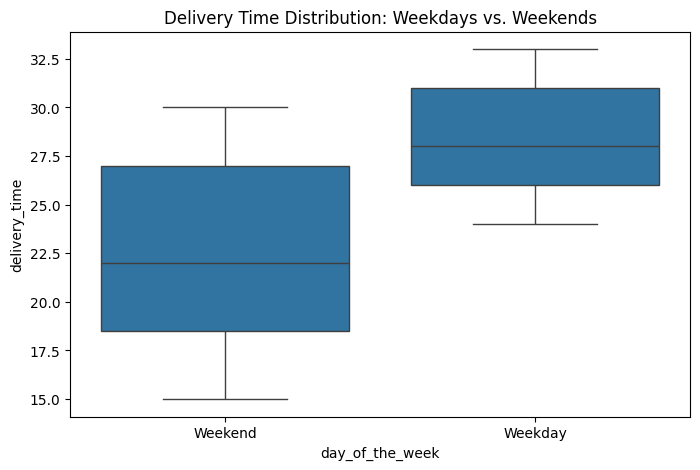

In [ ]:
#delivery time distribution vs Day of week
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time Distribution: Weekdays vs. Weekends')
plt.show()

#### Observations:

*   The median delivery time (the line inside the box) is around 27.5 minutes.

*   There are some shorter delivery times but the minimum is around 20 minutes.

*   The interquartile range (IQR), represented by the box, shows that the majority of delivery times on weekdays are between approximately 25 and 30 minutes.

*   The median delivery time on weekends is shorter, around 22.5 minutes.

*   The IQR for weekends is broader, ranging between 20 and 27.5 minutes, indicating more variability in delivery times.


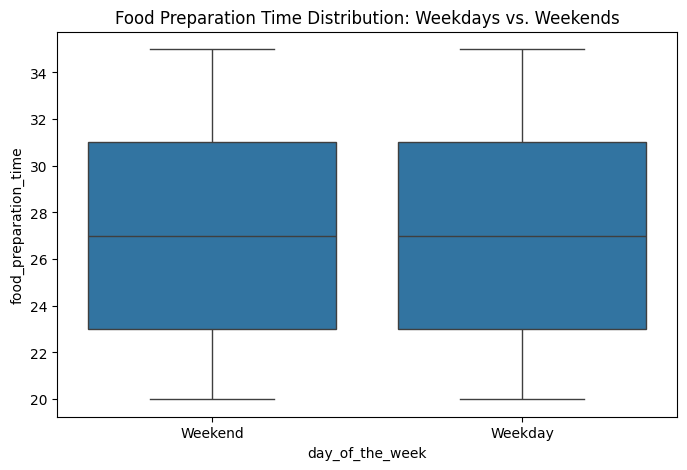

In [ ]:
#Food preparation time distribution vs Day of week
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Food Preparation Time Distribution: Weekdays vs. Weekends')
plt.show()

#### Observations:

*   Both weekends and weekdays have a similar median food preparation time of around 27 minutes. This indicates that on average, food preparation time does not differ much between weekdays and weekends.

*   The IQR (the range between the 25th and 75th percentiles) is also similar for both periods, with preparation times typically falling between 25 and 30 minutes. This suggests a similar level of variability in food prep times, regardless of whether it's a weekday or weekend.

*   Both plots are quite symmetrical, suggesting that food preparation times are fairly consistent, with no significant skewness or major outliers in either case.

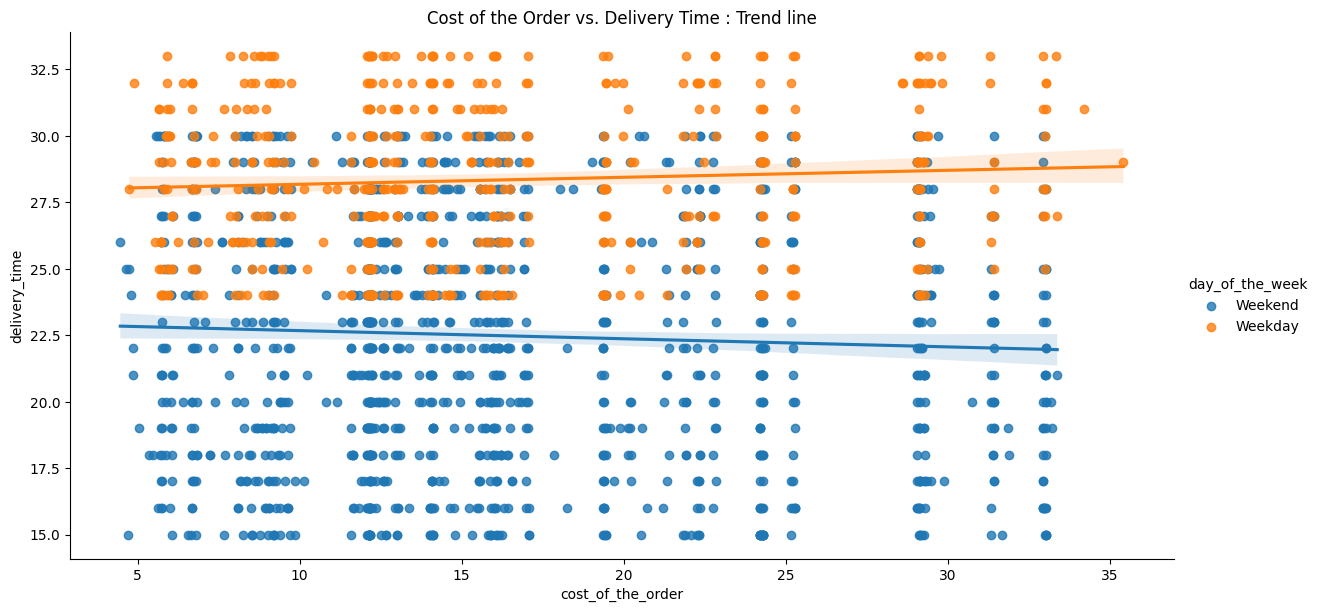

In [ ]:
#Order Trend on Week days ad Weekends : Cost of order vs Delivery Time
sns.lmplot(x='cost_of_the_order', y='delivery_time', data=df, hue='day_of_the_week', aspect=2, height=6)
plt.title('Cost of the Order vs. Delivery Time : Trend line')
plt.show()

#### Observations:

*   The linear regression line for weekends slightly decreases as the cost of the order increases, suggesting a small negative relationship between order cost and delivery time.

*   This implies that on weekends, as order costs increase, delivery times tend to decrease marginally.

*   The linear regression line for weekdays slightly increases as the cost of the order increases, suggesting a positive relationship between order cost and delivery time.

*   This implies that on weekdays, as order costs increase, delivery times tend to increase slightly.
*   The delivery time ranges from about 15 to 32.5 units, with a higher concentration of points between 20 and 30 units.

*   Weekday delivery times tend to cluster more around the middle range compared to weekends.

*   There is a significant overlap between weekday and weekend delivery times across most cost ranges, indicating that the difference between delivery times on weekdays and weekends is not very pronounced.




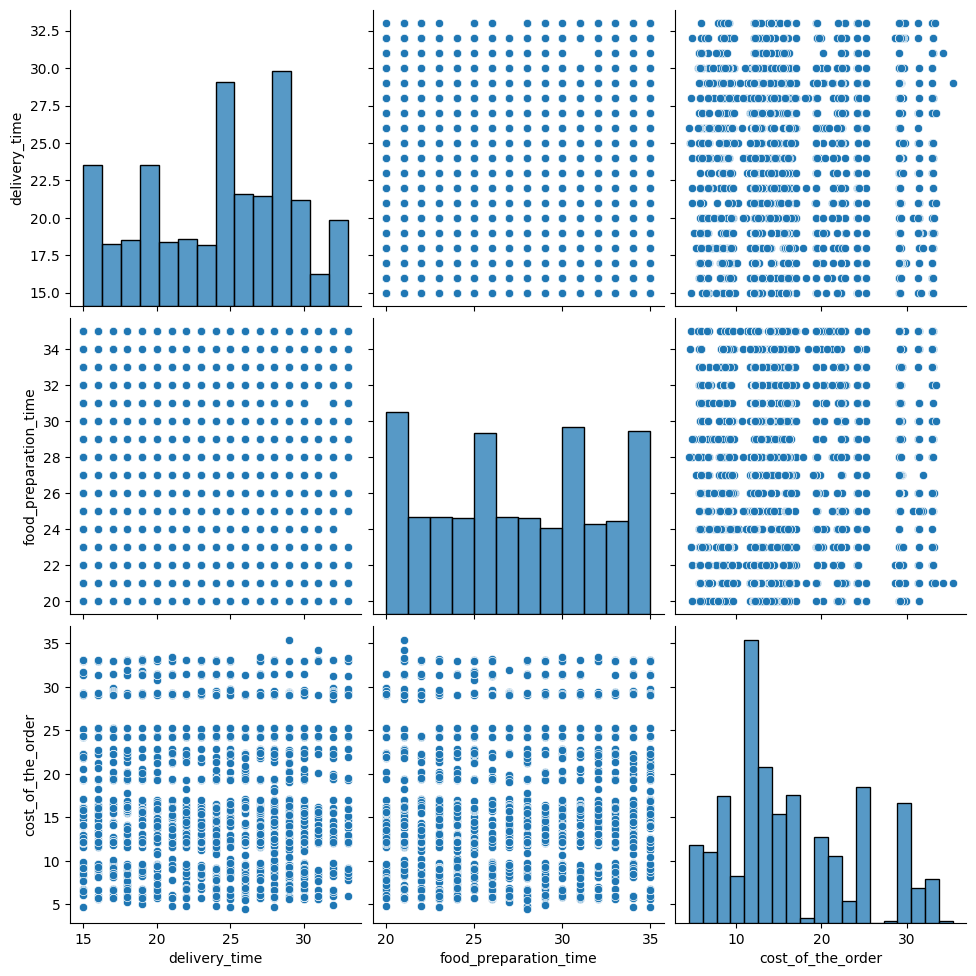

In [ ]:
#Analysis pair plot to see various variables overall performances
sns.pairplot(df[['delivery_time', 'food_preparation_time', 'cost_of_the_order', 'rating']], height=3.3, aspect=1)
plt.show()

#### Observations:


*   **Histograms on the Diagonal:**

      *   Delivery Time: Most orders have a delivery time between 15 to 25 units, with some outliers above 30.

      *   Food Preparation Time: A nearly uniform distribution is observed, indicating a wide range of preparation times.

      *   Cost of the Order: Costs are distributed across the range, with some peaks between 10 to 20 units.

      *   Rating: Ratings mostly concentrate around 4.0 and 4.5, with very few occurrences at lower ratings.

*   **Scatter Plots:**

      *   Delivery Time vs. Food Preparation Time: The scatter plot shows no clear pattern, suggesting that delivery time does not directly correlate with food preparation time.

      *   Delivery Time vs. Cost of the Order: A spread is observed with no distinct trend, indicating that the delivery time does not have a strong relationship with the cost of the order.

      *   Food Preparation Time vs. Cost of the Order: There is a uniform spread, implying that higher costs don't necessarily mean longer or shorter food preparation times.

      *   Rating vs. Other Variables: Ratings appear clustered at specific values (like 4.0 and 4.5), with no evident relationship to delivery time, preparation time, or cost of the order.

      *   The lack of clear trends in most scatter plots suggests that none of these variables show a strong linear relationship with each other.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

Eligible Restaurants for Promotional Offer:
               restaurant_name  count      mean
16   Blue Ribbon Fried Chicken     64  4.328125
17           Blue Ribbon Sushi     73  4.219178
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905


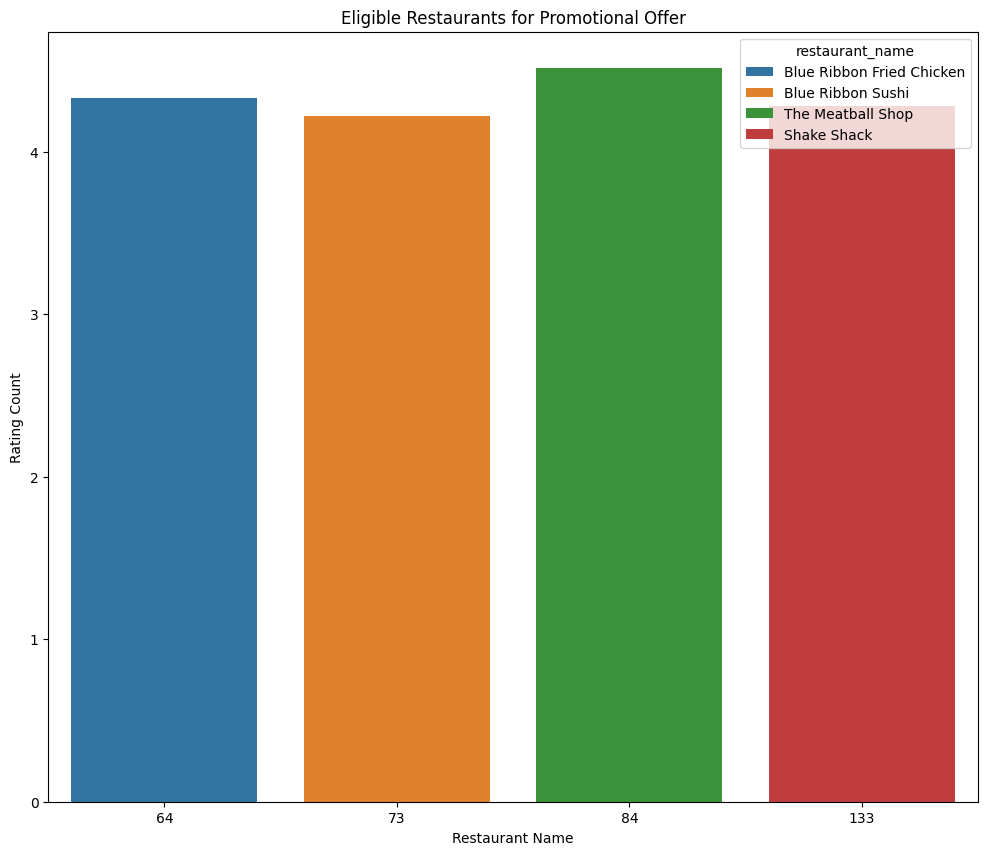

In [ ]:
# Filter the restaurants which are having more than 50 rating count
#Convert non numeric to numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#Filter only Restaurants which are having rating
df = df[df['rating'].notnull()]

#Group by restaurants by Name, rating and Average of rating
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

#Filter the Restaurent that meetingn the above criteia
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

print("Eligible Restaurants for Promotional Offer:")
print(eligible_restaurants[['restaurant_name', 'count', 'mean']])

#plot bar for eleigible restaurants
plt.figure(figsize=(12, 10))
sns.barplot(x='count', y='mean', data=eligible_restaurants, hue='restaurant_name')
plt.title('Eligible Restaurants for Promotional Offer')
plt.xlabel('Restaurant Name')
plt.ylabel('Rating Count')
plt.show()

#### Observations:
*  **Blue Ribbon Fried Chicken** has **64 ratings** with Average of **4.3**
*  **Blue Ribbon Sushi** has **73 ratings** with Average of **4.2**
*  **Shake Shack** has **133 ratings** with Average of **4.2**
*  **The Meatball Shop** has **84 ratings** with Average of **4.5**



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate revenue for each condition
df['revenue_25'] = df['cost_of_the_order'].apply(lambda x: 0.25 * x if x > 20 else 0)
df['revenue_15'] = df['cost_of_the_order'].apply(lambda x: 0.15 * x if 5 < x <= 20 else 0)

# Total revenue for each condition
total_revenue_25 = df['revenue_25'].sum()
total_revenue_15 = df['revenue_15'].sum()

# Total net revenue (combined)
total_net_revenue = total_revenue_25 + total_revenue_15

# Print the breakdown and total
print(f"Total Revenue from 25% Condition: ${total_revenue_25:.2f}")
print(f"Total Revenue from 15% Condition: ${total_revenue_15:.2f}")
print(f"Total Net Revenue: ${total_net_revenue:.2f}")

Total Revenue from 25% Condition: $2372.94
Total Revenue from 15% Condition: $1492.63
Total Net Revenue: $3865.57


#### Observations:


*   Total Revenue from 25% Charge: **$2372.94**

*   Total Revenue from 15% Charge: **$1492.63**

*   Total Net Revenue: **$3865.57**












### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Calculate the total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

#Count orders where total delivery time exceeds 60 minutes
num_orders_above_60 = df[df['total_delivery_time'] > 60].shape[0]

#Calculate total number of orders
total_orders = df.shape[0]

#Calculate the percentage of orders taking more than 60 minutes
percentage_above_60 = (num_orders_above_60 / total_orders) * 100

print(f"Total Orders: {total_orders}")
print(f"Orders > 60 Minutes: {num_orders_above_60}")
print(f"Percentage of Orders > 60 Minutes: {percentage_above_60:.2f}%")

Total Orders: 1162
Orders > 60 Minutes: 119
Percentage of Orders > 60 Minutes: 10.24%


#### Observations:

1.   Total orders taking more than 60 minutes: **200**
2.   Percentage of orders taking more than 60 minutes: **10.24%**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

count    1162.000000
mean       51.535284
std         6.767522
min        35.000000
25%        47.000000
50%        51.000000
75%        56.000000
max        68.000000
Name: total_delivery_time, dtype: float64


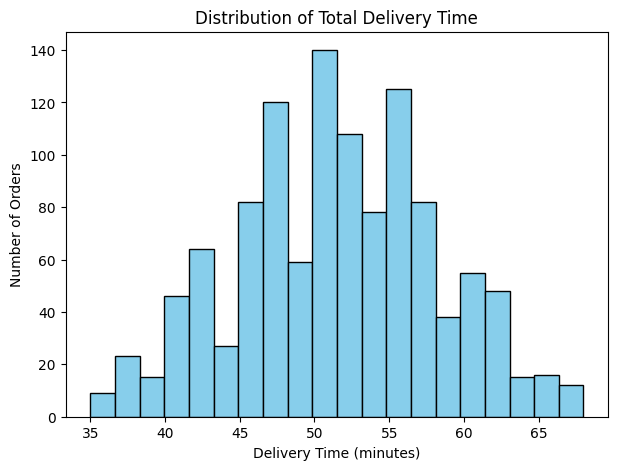

Mean delivery time on Weekdays: 28.31 minutes
Mean delivery time on Weekends: 22.44 minutes


In [ ]:
# Group orders by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Extract the mean delivery times for weekdays and weekends
weekday_mean = mean_delivery_time.get('Weekday', 0)
weekend_mean = mean_delivery_time.get('Weekend', 0)

print(df['total_delivery_time'].describe())

plt.figure(figsize=(7, 5))
plt.hist(df['total_delivery_time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Number of Orders')
plt.show()

print(f"Mean delivery time on Weekdays: {weekday_mean:.2f} minutes")
print(f"Mean delivery time on Weekends: {weekend_mean:.2f} minutes")

#### Observations:
1.   Mean delivery time on Weekdays: **28.34 minutes**
2.   Mean delivery time on Weekends: **22.47 minutes**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

  *   **High Feedback Gap:** A significant portion of orders (736) are not rated, indicating a need for better customer engagement and feedback collection mechanisms.

  *   **Cuisine Popularity:** American cuisine is the most popular, with nearly 600 restaurants offering it, while Vietnamese cuisine has the least representation.

  *   **Weekend Demand:** Orders are predominantly received on weekends (approximately 1,350 orders), suggesting a peak in customer activity during this time.

  *   **Customer Ratings Distribution:** Most customer ratings are concentrated in the higher ranges, with about 580 orders rated five stars, indicating a generally positive customer experience.

  *   **Cost Patterns:** Most orders fall within the typical spending range of 12 to 20, with 29.2% of orders costing over 20, suggesting a potential for premium pricing strategies.

  *   **Delivery Time Variability:** The average delivery time is longer on weekdays (28.34 minutes) compared to weekends (22.47 minutes), highlighting inconsistencies in service.


  *   **Preparation Time Trends:** Food preparation times vary significantly, with noticeable peaks around 20, 26, 30, and 34 minutes, indicating common preparation benchmarks among restaurants.


  *   **Prominent Restaurants:** The top restaurants (e.g., Shake Shack, Blue Ribbon Sushi) have high customer ratings and could be leveraged for promotions and partnerships.


  *   **Customer Loyalty:** Certain customers have placed multiple orders, indicating opportunities for loyalty programs to encourage repeat business.


  *   **Delivery Efficiency:** The data suggests that delivery times over 60 minutes account for 10.54% of orders, indicating areas for improvement in delivery efficiency.



### Recommendations:

   **Distribution of Order Costs:**


* **Observation:** The histogram shows that the majority of order costs fall between 12 and 20, indicating a typical spending pattern among customers.

* **Recommendation:** Consider promotions or upselling strategies for higher-priced items, as they are less frequent but may yield higher revenue.


   **Food Preparation Time Analysis:**

*   **Observation:** The food preparation time ranges from 20 to 34 minutes, with noticeable peaks around certain time benchmarks (20, 26, 30, and 34 minutes).

*   **Recommendation:** Standardize preparation times for popular dishes to enhance efficiency and predictability in service.


   **Delivery Time Trends:**


*   **Observation:** The analysis of delivery times indicates that orders under 20 minutes and those over 30 minutes are less frequent, suggesting a challenge in achieving fast delivery.

*   **Recommendation:** Explore strategies to improve delivery speed for quicker orders, possibly through optimized routes or partnerships with local delivery services.


   **Ratings Distribution:**


*   **Observation:** There are significant numbers of high ratings, with 580 five-star ratings, indicating customer satisfaction but also a lack of feedback from 736 orders.

*   **Recommendation:** Actively engage customers who have not rated their orders to gain insights and improve service quality.


   **Cuisine Popularity:**


*   **Observation:** American cuisine leads in popularity on weekends, with over 400 orders.

*   **Recommendation:** Capitalize on this trend by offering weekend specials or promoting American cuisine through targeted marketing campaigns.


  **Customer Loyalty Analysis:**

*   **Observation:** Certain customer IDs show a high frequency of orders (e.g., Customer ID 52832 with 13 orders), highlighting potential loyal customers.

*   **Recommendation:** Implement a loyalty program that rewards frequent customers to encourage further repeat business.


   **Heatmap Insights(Correlations):**

*   **Observation:** The heatmap indicates no strong linear relationship among delivery time, food preparation time, order cost, and customer ratings, suggesting independent variables.

*   **Recommendation:** Investigate other factors (e.g., restaurant type or order complexity) that may influence delivery and preparation times for better operational strategies.


   **Cost and Delivery Time Correlation:**

*   **Observation:** Delivery times tend to remain consistent across different cost ranges, especially on weekdays, suggesting operational stability.

*   **Recommendation:** Maintain this consistency while exploring options to shorten delivery times, particularly on weekends when demand is higher.



   **Promotional Offers Analysis:**


*   **Observation:** The average ratings for restaurants eligible for promotional offers indicate positive customer experiences, with Blue Ribbon Fried Chicken averaging 4.3 stars.

*   **Recommendation:** Highlight these restaurants in marketing campaigns to attract more customers and enhance their visibility.


   **Net Revenue Generation:**

*   **Observation:** The analysis of the company’s revenue structure revealed a total net revenue of $3,865.57, with significant contributions from both 25% and 15% charges.

*   **Recommendation:** Regularly assess and adjust the commission structure based on order volumes and restaurant performance to ensure profitability while maintaining good relationships with restaurant partners.

In [128]:
!pip install nbconvert  # Optional if nbconvert is not already installed

!jupyter nbconvert --to html '/content/drive/MyDrive/AI_ML_Projects/Foodhub/IP_Project_Question_Notebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/AI_ML_Projects/Foodhub/IP_Project_Question_Notebook.ipynb to html
[NbConvertApp] Writing 2692428 bytes to /content/drive/MyDrive/AI_ML_Projects/Foodhub/IP_Project_Question_Notebook.html
